# HY5: Seasonal Variation

**Hypothesis:** Northern Hemisphere has higher pollution in winter


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('../cleaned_data/openaq_cleaned.csv')
df = df[['latitude', 'measurement_month', 'parameter', 'value']].dropna()

# Define hemisphere
df['hemisphere'] = df['latitude'].apply(lambda x: 'NH' if x >= 0 else 'SH')

print(f"NH records: {(df['hemisphere']=='NH').sum():,}")
print(f"SH records: {(df['hemisphere']=='SH').sum():,}")

NH records: 11,493
SH records: 741


In [3]:
# Focus on NH PM2.5
nh_pm25 = df[(df['hemisphere']=='NH') & (df['parameter']=='PM25')]

# Winter vs Summer
winter = nh_pm25[nh_pm25['measurement_month'].isin([12,1,2])]['value']
summer = nh_pm25[nh_pm25['measurement_month'].isin([6,7,8])]['value']

print(f"Winter mean: {winter.mean():.2f} µg/m³")
print(f"Summer mean: {summer.mean():.2f} µg/m³")

# Test
t_stat, p_val = stats.ttest_ind(winter, summer)
print(f"\nt-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.4f}")

if p_val < 0.05 and winter.mean() > summer.mean():
    print("\n✓ Hypothesis SUPPORTED: Winter pollution peak confirmed")
else:
    print("\n✗ Hypothesis NOT supported")

Winter mean: 26.36 µg/m³
Summer mean: 18.23 µg/m³

t-statistic: 3.264
p-value: 0.0012

✓ Hypothesis SUPPORTED: Winter pollution peak confirmed


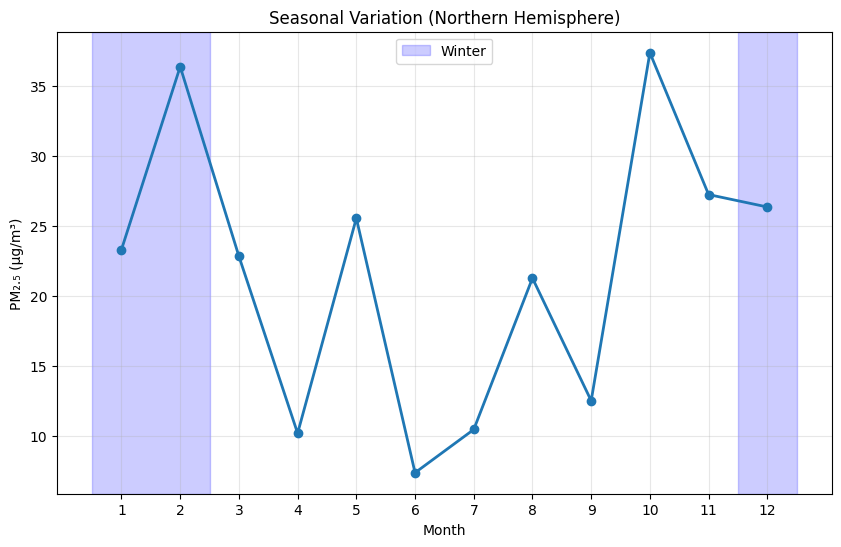

In [4]:
# Monthly plot
monthly = nh_pm25.groupby('measurement_month')['value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly.values, 'o-', linewidth=2)
plt.axvspan(0.5, 2.5, alpha=0.2, color='blue', label='Winter')
plt.axvspan(11.5, 12.5, alpha=0.2, color='blue')
plt.xlabel('Month')
plt.ylabel('PM₂.₅ (µg/m³)')
plt.title('Seasonal Variation (Northern Hemisphere)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/HY5_seasonal.png', dpi=300, bbox_inches='tight')
plt.show()